In [60]:
from data_pre_processing.fetch_data import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats, scipy.signal
import sklearn
import sklearn.linear_model

In [24]:
def describe(X):
    df = pd.DataFrame(X)
    print(df.describe())

### correlation of all movies against target movie:

In [40]:
def all_movies_against_target_movie_correlations():
    X_train, Y_train = get_X_Y_train()
    correlations = []
    
    for i in range(99):
        ratings = X_train[:,1,i]
        mask = ~np.isnan(ratings)
        
        ratings = ratings[mask]
        targets = Y_train[mask]
        
        correlations.append(sp.stats.pearsonr(ratings, targets)[0])
    
    return correlations

In [25]:
X_train, Y_train = get_X_Y_train()
all_users_ratings = X_train[:,1,:]

In [62]:
def detrend(time, target):
    assert len(time.shape) == 1 and len(target.shape) == 1
    time = time.reshape(len(time), -1)
    model = sklearn.linear_model.LinearRegression()
    model.fit(time,target)
    target = target - model.predict(time)
    return target

In [65]:
def get_ratings_and_dates_for_movie_i(i):
    X_train, _ = get_X_Y_train()
    ratings = X_train[:,1,i]
    dates = X_train[:,0,i]
    return ratings, dates

## Number of missing instances per movie


1543.0
1539.5353535353536
969.6442158419677


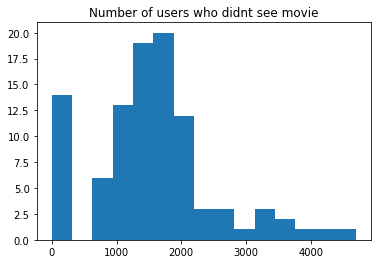

In [26]:

number_of_users_who_didnt_see = np.sum(np.isnan(all_users_ratings), axis=0)


print(np.median(number_of_users_who_didnt_see))
print(np.mean(number_of_users_who_didnt_see))
print(np.std(number_of_users_who_didnt_see))

plt.hist(number_of_users_who_didnt_see, bins='auto')  # arguments are passed to np.histogram
plt.title("Number of users who didnt see movie")
plt.show()

## Hypothesis: does the target movie rating depend on time watched?

In [30]:
X_train, Y_train = get_X_Y_train()
dates = X_train[:,2,0]
ratings = Y_train

sp.stats.pearsonr(ratings, dates)
# scipy.stats.kendalltau(ratings, dates)


(0.044886169194169837, 7.1116619539675365e-06)

### Yes, dont know in what way

## Hypothesis: do other movies have a stronger corellation between date and rating?

In [33]:
corrs = []

for i in range(99):
    mask = ~np.isnan(X_train[:,1,i])

    dates = X_train[:,0,i][mask]
    ratings = X_train[:,1,i][mask]
    
    
    corrs.append(sp.stats.pearsonr(ratings, dates))
    
    

In [35]:
describe(np.abs(corrs))

               0             1
count  99.000000  9.900000e+01
mean    0.059414  9.988449e-02
std     0.040939  2.302328e-01
min     0.000895  1.703394e-72
25%     0.025543  1.450402e-14
50%     0.057236  1.626407e-07
75%     0.084434  2.015861e-02
max     0.188846  9.358255e-01


In [45]:
corrs[0]

(0.05186034717782583, 1.340535673314057e-06)

In [41]:
movies_agains_target_corrs = all_movies_against_target_movie_correlations()

In [43]:
np.argmax(movies_agains_target_corrs)

48

In [44]:
movies_agains_target_corrs[48]

0.43386046072972

In [ ]:
sp.signal.detrend(

In [47]:
from scipy import signal
randgen = np.random.RandomState(9)
npoints = 1000
noise = randgen.randn(npoints)
x = 3 + 2*np.linspace(0, 1, npoints) + noise
(signal.detrend(x) - noise).max() < 0.01

True

In [74]:
diff_in_correlations = []
for i in range(99):
    ratings, dates = get_ratings_and_dates_for_movie_i(i)
    mask = ~np.isnan(ratings)
    ratings = ratings[mask]
    dates = dates[mask]
    target_movie_ratings = Y_train[mask]

    detrended_ratings = detrend(dates, ratings)

    diff_in_correlations.append(\
        sp.stats.pearsonr(ratings, target_movie_ratings)[0] - \
        sp.stats.pearsonr(detrended_ratings, target_movie_ratings)[0])

In [75]:
describe(diff_in_correlations)

               0
count  99.000000
mean    0.000987
std     0.003118
min    -0.006858
25%    -0.001508
50%     0.000959
75%     0.002967
max     0.009480
